<a href="https://colab.research.google.com/github/ramendra1990/ee_workshop_2022/blob/main/SSModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scenario 1
_Force balance_
$$\delta (t)=(\delta_{ini}-F)cos(wt)+\frac{V_{ini}}{w}sin(wt)+F$$
$$V=\frac{d\delta}{dt}$$
_Velocity dependence of friction_
$$\mu = \mu_0+alog\frac{V}{V_0}$$
\
where, $F=\delta_{lp}-\frac{\mu\sigma}{K}$ and $w=\sqrt{\frac{K}{M}}$

In [112]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the model 1
a = -0.003
Vl = 1e-3 # Loading Rate [m/s]
Vini = 1e-6 #Initial Velocity [m/s]
NormalStress = 2e6 # 2Mpa
V0 = 1e-9 # Reference velocity [m/s]
Friction0 = 0.6 # reference friction
FrictionI = Friction0 + a * np.log(Vini/V0) # Initial friction
Mass = 1000 # per unit area [kg/m^2] (10kg on 0.1 m by 0.1 m]
K = 32 # [MPa/m] Set stiffness 0.8 of critical stiffness
Xl = FrictionI * NormalStress / K # initial load point

In [113]:
FrictionI

0.6207232658369464

In [114]:
# Time Step Control
Dt = 1e-5 # Time step [second]
TotalTime = 2 #Total time [second]
TotalStep = round(TotalTime / Dt) # Total steps

In [115]:
TotalStep

200000

In [116]:
# Convergence control
V_eps = 1e-7  # Convergence criterion in NR

In [117]:
# Simulation begins
XlOld = Xl
Omega = np.sqrt(K/Mass)
Step = 0
disp = np.zeros((TotalStep, 1))
vel = np.zeros((TotalStep, 1))
vel[0] = Vini
mu = np.zeros((TotalStep, 1))
mu[0] = FrictionI
Time = np.zeros((TotalStep, 1))

In [106]:
disp[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [107]:
#TotalStep - 1
for i in range(TotalStep - 1):

  F = XlOld - (mu[i] * NormalStress) / K
  disp[i + 1] = (disp[i] - F) * np.cos(Omega * Dt) + (vel[i] / Omega) * np.sin(Omega * Dt) + F
  vel[i + 1] = (disp[i + 1] - disp[i]) / Dt
  mu[i + 1] = mu[0] + a * np.log(vel[i + 1] / V0)
  Time[i + 1] = Time[i] + Dt

  dV = vel[i + 1] - vel[i]

  if i % 10000 == 0:
    print(i)
  #if dV < V_eps:
    #break



0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [108]:
disp.shape

(200000, 1)

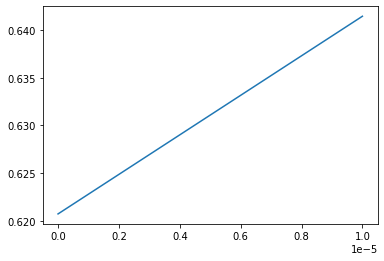

In [111]:
plt.figure()
plt.plot(Time, mu)

In [99]:
dV

array([0.00074824])

## Scenario 2
_Force balance_
$$\delta (t)=(\delta_{ini}-F)cos(wt)+\frac{V_{ini}}{w}sin(wt)+F$$
$$V=\frac{d\delta}{dt}$$
_State dependence of friction_
$$\mu = \mu_0+blog\frac{\theta}{\theta_0}$$
_State evolution (aging law)_
$$\frac{d\theta}{dt}=1-\frac{\theta}{\theta_0}$$
\
where, $\theta_0=\frac{D_c}{V_0}$, $F=\delta_{lp}-\frac{\mu\sigma}{K}$ and $w=\sqrt{\frac{K}{M}}$

In [119]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the model 1
b = 0.006
Vl = 1e-3 # Loading Rate [m/s]
Vini = 1e-6 #Initial Velocity [m/s]
NormalStress = 2e6 # 2Mpa
V0 = 1e-9 # Reference velocity [m/s]
Dc = 1e-6 # [m]
ThetaI = Dc / Vini # Initial State - set Start from steady state
Friction0 = 0.6 # reference friction
FrictionI = Friction0 + a * np.log(Vini/V0) # Initial friction
Mass = 1000 # per unit area [kg/m^2] (10kg on 0.1 m by 0.1 m]
K = 32 # [MPa/m] Set stiffness 0.8 of critical stiffness
Xl = FrictionI * NormalStress / K # initial load point

## Scenario 3
_Force balance_
$$\delta (t)=(\delta_{ini}-F)cos(wt)+\frac{V_{ini}}{w}sin(wt)+F$$
$$V=\frac{d\delta}{dt}$$
_State dependence of friction_
$$\mu = \mu_0+alog\frac{V}{V_0}+blog\frac{\theta}{\theta_0}$$
_State evolution (aging law)_
$$\frac{d\theta}{dt}=1-\frac{\theta}{\theta_0}$$
\
where, $\theta_0=\frac{D_c}{V_0}$, $F=\delta_{lp}-\frac{\mu\sigma}{K}$ and $w=\sqrt{\frac{K}{M}}$

## <font color = 'red'>Ex 2
$$
\frac{d\theta}{dt} = -v[\theta+(1+\epsilon) log(v)]\
$$
$$
\frac{du}{dt}=v-1
$$
$$
\frac{dv}{dt}=-r^2[u+\frac{1}{e}(\theta+log(v))]
$$

- *Find the solution for r=0.8, e=0.8, $\epsilon$=0.2
- Find the solution for $\epsilon$=1.9
- Find the solution for r=1.0, e=0.6, $\epsilon$=12

*Find theta (state), u (slip) and v (slip rate) for 100 secs\
*Plot the time series in a single plot (can use subplot)

__Advanced__
- Comment on the nature of the solution for the different sets of parameters.